# Customer Churn Prediction

## Objective
1. Perform exploratory analysis and extract insights from the dataset.

2. Split the dataset into train/test sets and explain your reasoning.

3. Build a predictive model to predict which customers are going to churn.

4. Establish metrics to evaluate model performance.

## Exploratory Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("customer_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**State**	The state where a customer comes from

**Account length**	Number of days a customer has been using services

**Area code**	The area where a customer comes from Phone number Alphanumeric	The phone number of a customer

**International plan**	The status of customer international plan

**Voicemail plan**	The status of customer voicemail plan

**No. vmail msgs**	Number of voicemail message sent by a customer

**Total day minutes**	Total call minutes spent by a customer during day time

**Total day calls**	Total number of calls made by a customer during day time

**Total day charge**	Total amount charged to a customer during day time

**Total eve minutes**	Total call minutes spent by a customer during evening time

**Total eve calls**	Total number of calls made by a customer during evening time

**Total eve charge**	Total amount charged to a customer during evening time

**Total night minutes**	Total call minutes spent by a customer during night time

**Total night calls**	Total number of calls made by a customer during night time

**Total night charge**	Total amount charged to a customer during night time

**Total intl minutes**	Total international call minutes spent by a customer

**Total intl calls**	Total number of international calls made by a customer

**Total int charge**	Total international call amount charged to a customer

**Customer service calls**	Total number of customer service calls made by a customer

**Churn**	Whether a customer is churned or not

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### State

In [5]:
df['state'].nunique()

51

#### Area Code

In [6]:
df['area code'].nunique()

3

In [7]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [8]:
df.groupby('state')['area code'].nunique().head()

state
AK    3
AL    3
AR    3
AZ    3
CA    3
Name: area code, dtype: int64

#### Phone number

In [9]:
df['phone number'].nunique()

3333

#### International Plan

In [10]:
df['international plan'].nunique()

2

In [11]:
df['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

#### Voice mail Plan

In [12]:
df['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

### Replace categorical data to numerical

In [13]:
df['international plan'] = df['international plan'].replace({'yes':1, 'no':0})
df['voice mail plan'] = df['voice mail plan'].replace({'yes':1, 'no':0})
df['churn'] = df['churn'].astype(int)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [14]:
df_final = df.drop(columns = ['phone number', 'state', 'area code'])
df_final.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


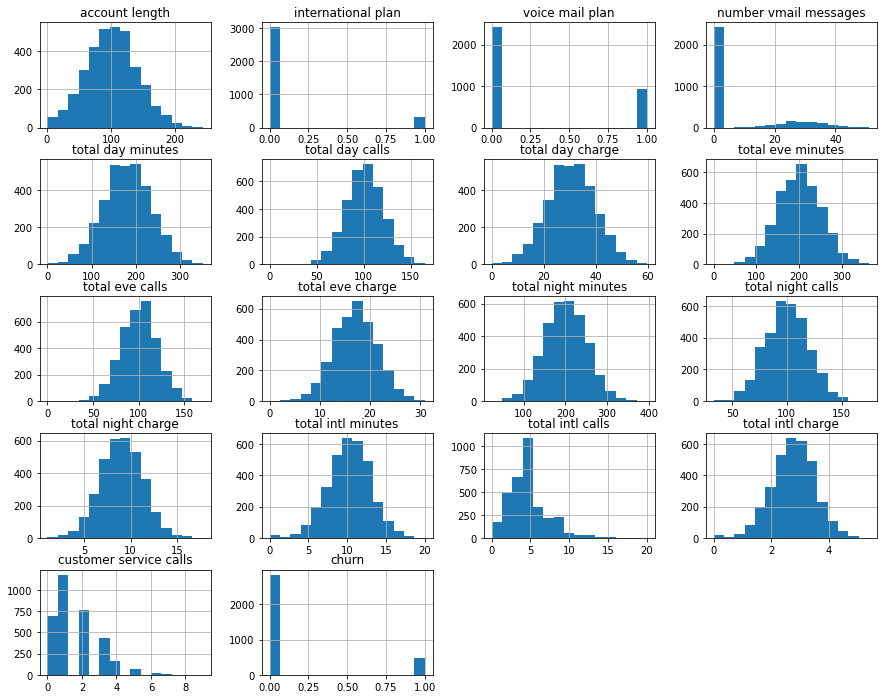

In [15]:
import matplotlib.pyplot as plt

df_final.hist(figsize=(15,12),bins = 15)
plt.show()

In [16]:
df_final.groupby(['churn'])['churn'].count()

churn
0    2850
1     483
Name: churn, dtype: int64

### Section Summary

- Most of the customer don't use internationl plan and voice mail service

- Half of customers live in area code 415

- Earn more by total day calls

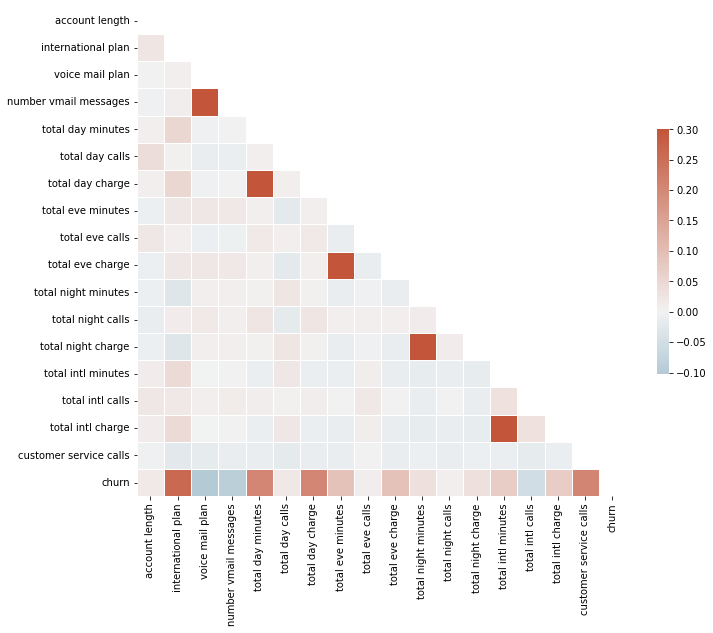

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

### Heatmap Summary

**Positive Correlation**
- Total data charge and total data minutes --> churn

- Total eve charge with total eve minutes

- Total night charge with total night minutes

- International plan --> churn

- Customer service calls --> churn


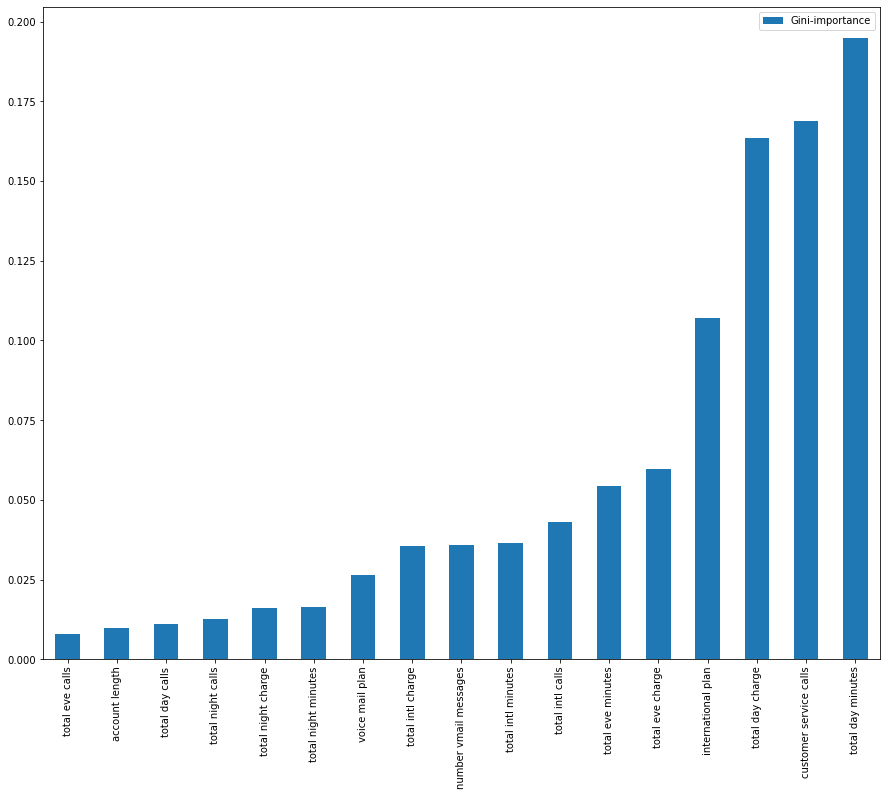

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

le = preprocessing.LabelEncoder()
y = le.fit_transform(df_final["churn"])

X = df_final.drop(columns=["churn"])

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest =  RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)
feats = {} 
for feature, importance in zip(df_final.drop(columns=["churn"]).columns, forest.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()

## Predictive Model

In [19]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y = le.fit_transform(df_final["churn"])
X = df_final.drop(columns=["churn"])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes",
    "Logistic Regression"
]

classifiers = [

    KNeighborsClassifier(), 
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()

]


In [22]:
from sklearn.metrics import f1_score
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.89 f1_score: 0.71 Model: Nearest Neighbors
accuracy: 0.91 f1_score: 0.82 Model: Decision Tree
accuracy: 0.95 f1_score: 0.89 Model: Random Forest
accuracy: 0.85 f1_score: 0.69 Model: Naive Bayes
accuracy: 0.86 f1_score: 0.62 Model: Logistic Regression


## Evaluation

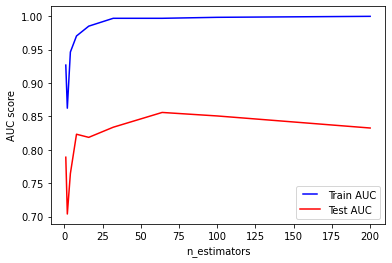

In [23]:
from sklearn.metrics import roc_curve, auc

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

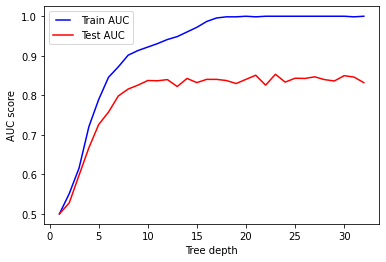

In [24]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [25]:
name = [
    "Random Forest",
]

classifier = [ 
    RandomForestClassifier(n_estimators = 30,max_depth=16, random_state=42),

]

In [26]:
for name, clf in zip(name, classifier):
        clf.fit(X_train, y_train)
        acc_score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)
        f_score = f1_score(y_test, y_pred, average='macro')
        print("accuracy:", "{:.2f}".format(acc_score), "f1_score:", "{:.2f}".format(f_score), "Model:", name)

accuracy: 0.95 f1_score: 0.89 Model: Random Forest
